Expectations and problem statement:
- We want to evaluate the relationship between the different variables and customer churn
- We also want to recommend what we think the organsiation needs to do based on the findings


In [1]:
# We import libraries
# used for data analysis
import pandas as pd
import numpy as np

#used for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# data pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\ifeaw\Downloads\Customer-Churn - Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
# to find the charcteristics of the numerical data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# to find the characteristics of the categorical data 
df.describe(exclude= ["int64", "float64"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [8]:
# Missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: >

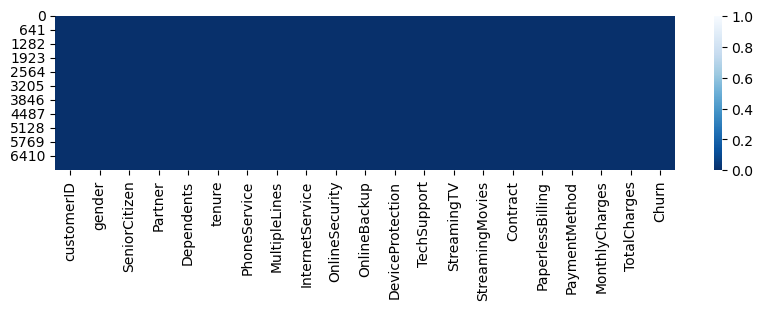

In [9]:
# visualisig the missing values
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

In [10]:
df.duplicated().sum()

0

In [11]:
# to remove missing values
df.dropna(inplace=True)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# to find the characteristics of the categorical data 
df.describe(exclude= ["int64", "float64"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [14]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Univariate anlysis

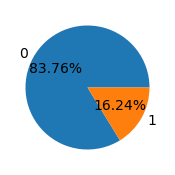

In [15]:
fig,ax = plt.subplots(figsize=(2,4))
count = Counter(df["SeniorCitizen"])
ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%")
plt.show()

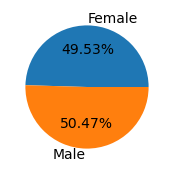

In [16]:
fig,ax = plt.subplots(figsize=(2,2))
count = Counter(df["gender"])
ax.pie(count.values(), labels=count.keys(), autopct = lambda p: f"{p:.2f}%")
plt.show()

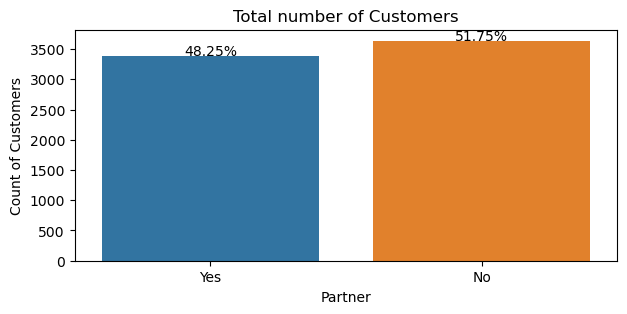

In [17]:
plt.figure(figsize=(7,3))
ax1=sns.countplot(x="Partner", data=df)
plt.xlabel("Partner")
plt.ylabel("Count of Customers")
plt.title("Total number of Customers")

total_count = len(df)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.0,
            '{:.2f}%'.format((height / total_count) * 100),
            ha="center")

plt.show()

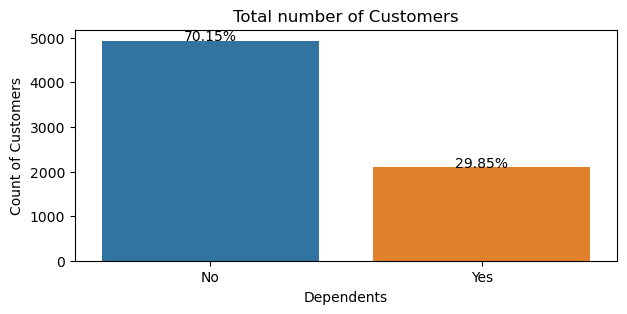

In [18]:
plt.figure(figsize=(7,3))
ax2=sns.countplot(x="Dependents", data=df)
plt.xlabel("Dependents")
plt.ylabel("Count of Customers")
plt.title("Total number of Customers")

total_count = len(df)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.0,
            '{:.2f}%'.format((height / total_count) * 100),
            ha="center")

plt.show()

<Axes: xlabel='tenure'>

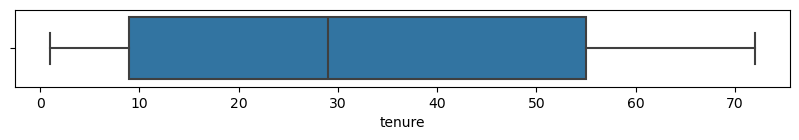

In [19]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df['tenure'])

<Axes: xlabel='MonthlyCharges'>

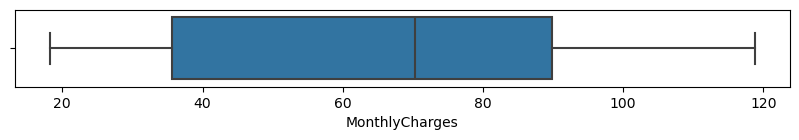

In [20]:
plt.figure(figsize=(10,1))
sns.boxplot(x=df['MonthlyCharges'])

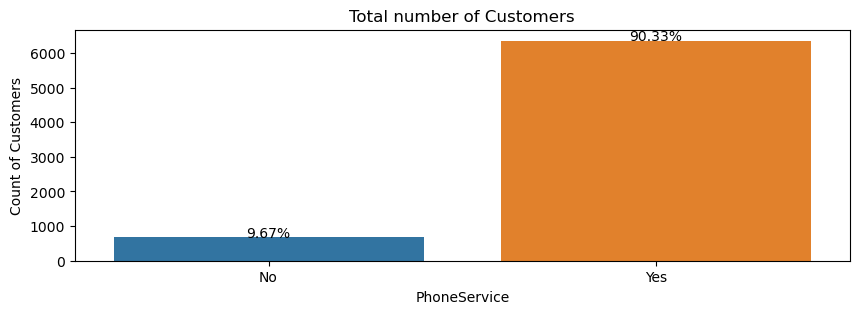

In [21]:
plt.figure(figsize=(10,3))
ax3=sns.countplot(x="PhoneService", data=df)
plt.xlabel("PhoneService")
plt.ylabel("Count of Customers")
plt.title("Total number of Customers")

total_count = len(df)
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 0.0,
            '{:.2f}%'.format((height / total_count) * 100),
            ha="center")

plt.show()

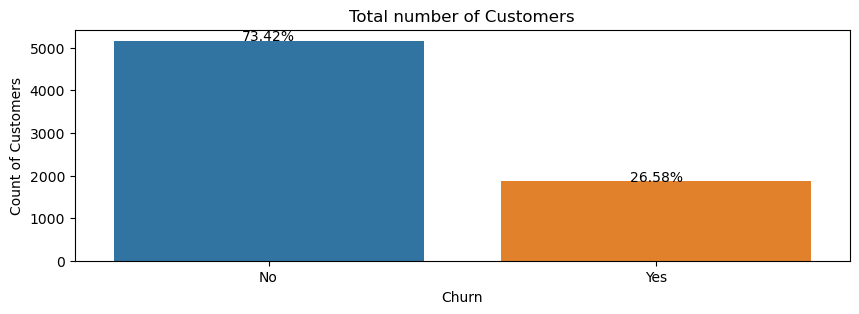

In [22]:
plt.figure(figsize=(10,3))
ax4=sns.countplot(x="Churn", data=df)
plt.xlabel("Churn")
plt.ylabel("Count of Customers")
plt.title("Total number of Customers")

total_count = len(df)
for p in ax4.patches:
    height = p.get_height()
    ax4.text(p.get_x() + p.get_width() / 2., height + 0.0,
            '{:.2f}%'.format((height / total_count) * 100),
            ha="center")

plt.show()

# Bivariate anlysis

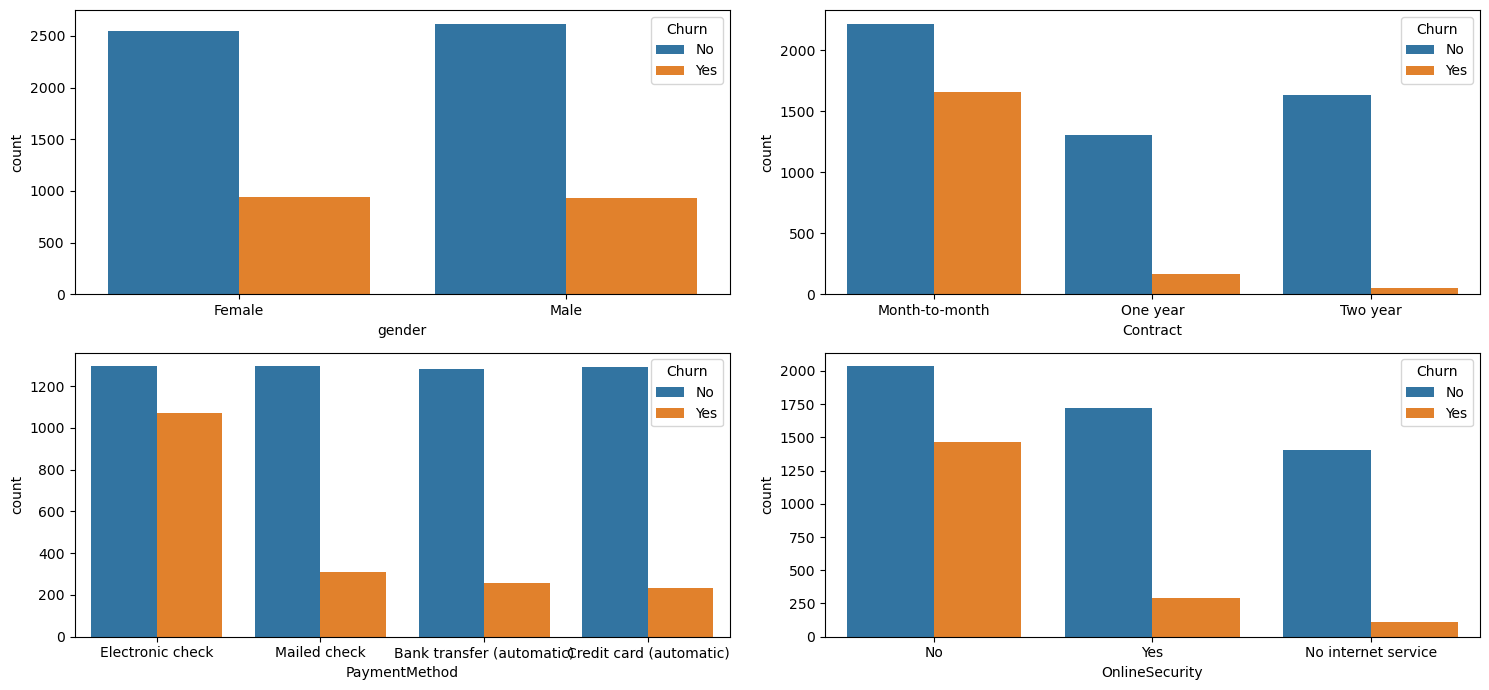

In [23]:
fig, axs= plt.subplots(2,2, figsize=(15,7))
plt1=sns.countplot(x="gender", data=df, hue="Churn", ax=axs[0,0])
plt2=sns.countplot(x="Contract",  data=df, hue="Churn", ax=axs[0,1])
plt3=sns.countplot(x="PaymentMethod",  data=df, hue="Churn", ax=axs[1,0])
plt4=sns.countplot(x="OnlineSecurity",  data=df, hue="Churn", ax=axs[1,1])
plt.tight_layout()

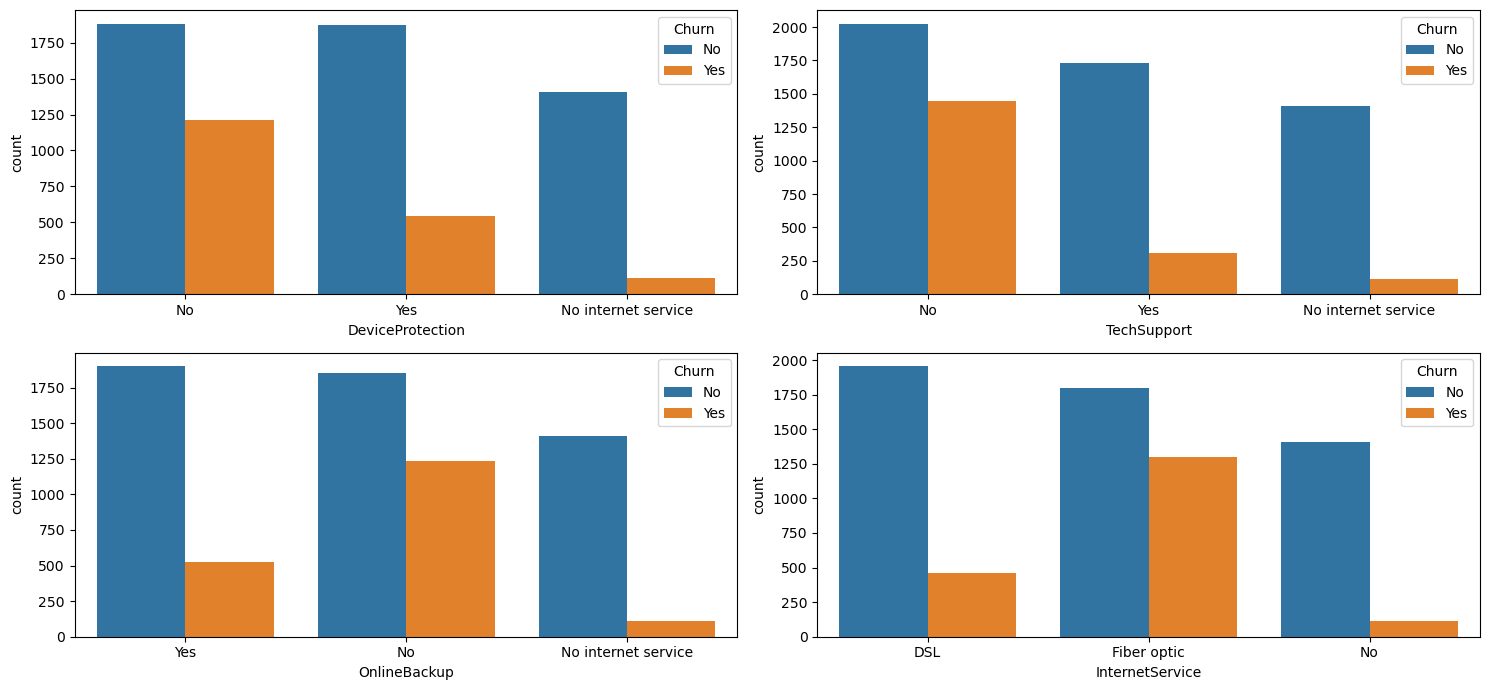

In [24]:
fig, axs= plt.subplots(2,2, figsize=(15,7))
plt1=sns.countplot(x="DeviceProtection", data=df, hue="Churn", ax=axs[0,0])
plt2=sns.countplot(x="TechSupport",  data=df, hue="Churn", ax=axs[0,1])
plt3=sns.countplot(x="OnlineBackup",  data=df, hue="Churn", ax=axs[1,0])
plt4=sns.countplot(x="InternetService",  data=df, hue="Churn", ax=axs[1,1])
plt.tight_layout()

# Multivariate analysis

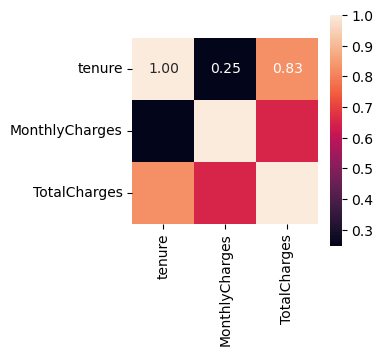

In [25]:
data=["tenure",	"MonthlyCharges", "TotalCharges"]
plt.figure(figsize=(3,3))
sns.heatmap(df[data].corr(), cbar=True, annot=True, square=True, fmt=".2f",
               annot_kws={"size":10});

###### multivariate anlysis
plt.figure(figsize=(15,5))
sns.barplot(data=df, y="MonthlyCharges", x="tenure", hue="Churn")

# Feature engineering

### Encoding categorical variables

In [26]:
# create a copy of the data
df1=df.copy()

# dropping off some redundant features
df1.drop(["customerID"], axis=1, inplace=True)

# Encode the categorical data
df1 = pd.get_dummies(df1,drop_first=True)

In [27]:
# segmenting the dataset into data and target label. The target here is the 'Churn'
target=df1.pop("Churn_Yes")

In [28]:
# normalise and scale the data using MinMaxScaler
scaler=MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


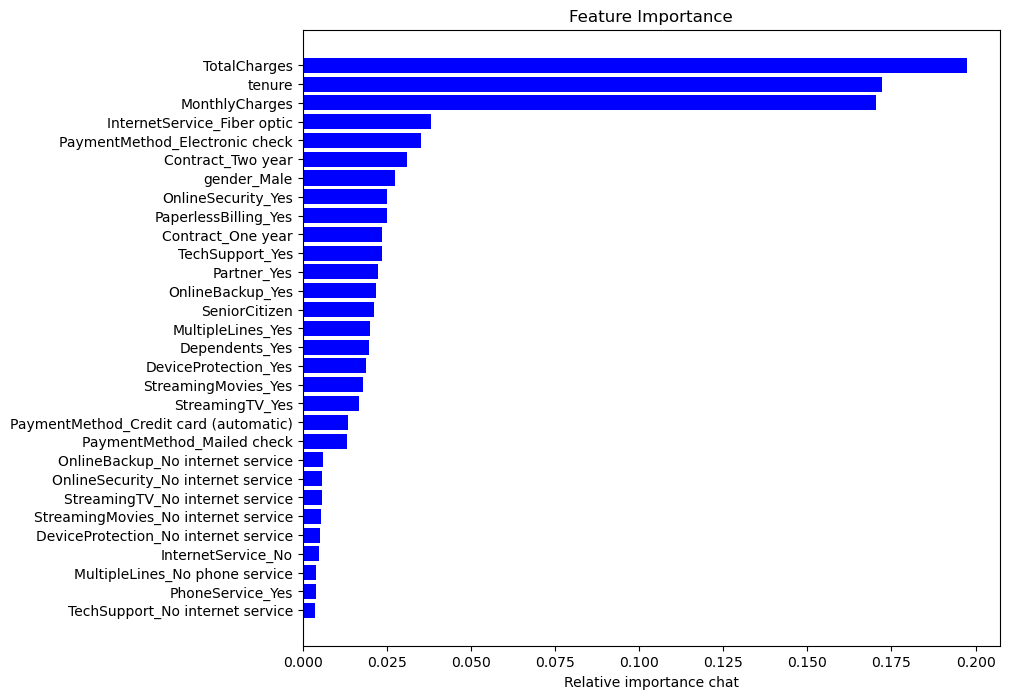

In [29]:
## feature importance score for feature selection
model = RandomForestClassifier()
model.fit(df1_scaled,target)
name_f = list(df1.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

#plotting a feature importance chart
plt.figure(figsize=(9,8))
plt.barh(range(len(indices)),importances[indices], color='blue', align="center")
plt.yticks(range(len(indices)),[name_f[i] for i in indices])
plt.xlabel("Relative importance chat")
plt.title("Feature Importance")
plt.show()

In [30]:
# feature selection: contract, internet service, online security, online backup, device protection, tech support, payment method, 
# and top 10 on the importances
df2_scaled= df1_scaled.copy()

In [31]:
df2_scaled.drop(["gender_Male", "Partner_Yes", "Dependents_Yes", "MultipleLines_No phone service", "MultipleLines_Yes", "PhoneService_Yes", "StreamingTV_No internet service", "StreamingTV_Yes", "StreamingMovies_No internet service", "StreamingMovies_Yes"], axis=1, inplace=True)

In [32]:
df2_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   float64
 1   tenure                                 7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   InternetService_Fiber optic            7032 non-null   float64
 5   InternetService_No                     7032 non-null   float64
 6   OnlineSecurity_No internet service     7032 non-null   float64
 7   OnlineSecurity_Yes                     7032 non-null   float64
 8   OnlineBackup_No internet service       7032 non-null   float64
 9   OnlineBackup_Yes                       7032 non-null   float64
 10  DeviceProtection_No internet service   7032 non-null   float64
 11  Devi

## Model selection, training and validation

### Model selection:
- We will train and test using 3 supervised learning models.
- The target data, 'Churn', is a categorical data and has a discrete class label. Therefore, I have chosen 3 classifier models that are better suited for when the target data is categorical and has a discrete class label.
- They models are: Decision Tree Classifier, Support Vector Classification (SVC), XGBClassifier

In [33]:
# Importing predictive classifier models
#!pip install xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [34]:
# Segmenting target label from the dataset
from sklearn.model_selection import train_test_split

### Model training and evaluation

In [35]:
# split the DataFrame into train and test datasets
X_train, X_test, y_train, y_test=train_test_split(df2_scaled, target, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

#### Model 1: Decision Tree Classifier 

In [37]:
# Instantiate the model
dtcmodel = DecisionTreeClassifier()

# Train the model
dtcmodel.fit(X_train, y_train)

# Make predictions
dtcy_pred = dtcmodel.predict(X_test)

In [38]:
# Evaluate and print results for model performance 
print("Decision Tree Classifier")
print("")
print("Accuracy:", accuracy_score(y_test, dtcy_pred))
print("Precision:", precision_score(y_test, dtcy_pred))
print("Recall:", recall_score(y_test, dtcy_pred))
print("F1-score:", f1_score(y_test, dtcy_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, dtcy_pred))

Decision Tree Classifier

Accuracy: 0.7356076759061834
Precision: 0.5026737967914439
Recall: 0.5026737967914439
F1-score: 0.5026737967914439
ROC-AUC Score: 0.6613078567693909


In [39]:
# Evaluate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, dtcy_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1033
        True       0.50      0.50      0.50       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



In [40]:
# Evaluate and visualise the confusion matrix 

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dtcy_pred))

#dtc=confusion_matrix(y_test, dtcy_pred)
#sns.heatmap(dtc, annot=True, cmap="Blues", fmt="g")
#plt.xlabel("Predicted")
#plt.ylabel("Actual")
#plt.title("Confusion matrix")
# plt.show()


Confusion Matrix:
[[847 186]
 [186 188]]


#### Model 2: Support Vector Classification (SVC)

In [41]:
# Instantiate the model
svcmodel = SVC()

# Train the model
svcmodel.fit(X_train, y_train)

# Make predictions
svcy_pred = svcmodel.predict(X_test)

In [42]:
# Evaluate and print results for model performance 
print("Support Vector Classification (SVC)")
print("")
print("Accuracy:", accuracy_score(y_test, svcy_pred))
print("Precision:", precision_score(y_test, svcy_pred))
print("Recall:", recall_score(y_test, svcy_pred))
print("F1-score:", f1_score(y_test, svcy_pred))
print("ROC AUC Score:", roc_auc_score(y_test, svcy_pred))

Support Vector Classification (SVC)

Accuracy: 0.7761194029850746
Precision: 0.6064981949458483
Recall: 0.44919786096256686
F1-score: 0.5161290322580645
ROC AUC Score: 0.6718399759798314


In [43]:
# Evaluate and print classification report
print("\nClassification Report:")
print(classification_report(y_test, svcy_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.89      0.85      1033
        True       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.76      1407



In [44]:
# Evaluate and visualise the confusion matrix 
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svcy_pred))


Confusion Matrix:
[[924 109]
 [206 168]]


svc=confusion_matrix(y_test, dtcy_pred)
sns.heatmap(svc, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

#### Model 3: XGBoost Classifier

In [45]:
# Instantiate the model
xgmodel = XGBClassifier()

# Train the model
xgmodel.fit(X_train, y_train)

# Make predictions
xgy_pred = xgmodel.predict(X_test)

In [46]:
# Evaluate and print results for model performance 
print("XGBoost Classifier")
print("")
print("Accuracy:", accuracy_score(y_test, xgy_pred))
print("Precision:", precision_score(y_test, xgy_pred))
print("Recall:", recall_score(y_test, xgy_pred))
print("F1-score:", f1_score(y_test, xgy_pred))
print("ROC AUC Score:", roc_auc_score(y_test, xgy_pred))

XGBoost Classifier

Accuracy: 0.7782515991471215
Precision: 0.5987261146496815
Recall: 0.5026737967914439
F1-score: 0.5465116279069767
ROC AUC Score: 0.6903494831004654


In [47]:
# Evaluate and print classification report 
print("\nClassification Report:")
print(classification_report(y_test, xgy_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      1033
        True       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [53]:
# Evaluate and visualise the confusion matrix 
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xgy_pred))


Confusion Matrix:
[[907 126]
 [186 188]]


xg=confusion_matrix(y_test, xgy_pred)
sns.heatmap(xg, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

## Interpretation

Observations on the data, and the data cleaning process:

- We observe that the data is made up of predominatly categorical data, and there is need to convert it to numerical data for easy analysis using Python. With a total of 21 features, we have 4 features with numerical data and 17 features with categorical data.
- We have a total of 7,043 entries for each feature. I used the heatmap to visualise the missing data and assess the impact on the analysis, the colour consistency throughout the map indicates that is negligible. However, I have decided to remove the rows with missing values for easier analysis. I delete them because the missing values are not significant in number. We are left with a total of 7,032 entries for each feature, and this is suffecient for the analysis.
- There are no duplicate values.

Observations on the univariate data analysis and general statistics:
- About 16.24% of the users are senior citizens, while 83.76% are not. It is represented in the pie chart.
- The number of male and female customers are very close: 49.53% of customers are female, and 50.47% of customers are male. It is represented in the pie chart.
- The number of customers with partners and those without are quite close, with 51.75% of customers without partners and 48.25% with partners. It is represented in the bar chart.
- About 70.15% of customers do not have dependents, while 29.85% of customers have dependents. It is represented in the bar chart.
- I observe, through the boxplot, the absence of outliers when looking at the length of the tenure of customers and it is positively skewed.
- I also observe, through the boxplot, the absence of outliers when looking at the monthly payment of customers and it is negatively skewed.
- 90.33% of customers have a phone service, while 9.67% of customers don't. It is represented in the bar chart.
- 73.42% of customers have churned, while 26.58% of customers have not churned. It is represented in the bar chart.

Observations on the bi-varaite data analysis:
- We can observe from the combined coutplots that the churn number of both male and female are very similar.
- It also shows that those with month-to-month contract, and those who used the fibre optic internet service had higher numbers of customers who churned.
- Customers without online security, without online backup, without device protection and without tech support had relatively higher churn numbers. 
- Those who used electronic check as a payment method had significantly high numbers of customers who churned as against those who stayed with the network (the highest churn rate so far), when comapred with those who used other methods of payment.

Observations on the multivariate data analysis:
- We observe from the correlation analysis, showing a correlation value of 0.25, that there is a weak positive relationship between the tenure (how long a customer stays) and the monthly charges.
- We however observe that there is a strong positive realtionship, with a correlation value of 0.83, between the tenure (how long a customer stays) and the overall charges.

Feature selection:
- I carried out the following data preprocessing steps: created a copy of the data; dropped off some redundant features; encoded the categorical data; segmented the dataset into data and target label-with the target here as 'Churn'; normalised and scaled the data using MinMaxScaler; and carried out a feature importance score for feature selection. 
- Based on insights from my EDA, and the Importances chart, I select the following features to test/train the model: contract, internet service, online security, online backup, device protection, tech support, payment method, including the top 10 in the feature Importance chart.

Feature Importannce
- Monthly charges, total charges and tenure seem to have a strong relationship with the churn

Model selection:
- The target data, 'Churn', is a categorical data and has a discrete class label. Therefore, I have chosen 3 regression models that are better suited for when the target data is categorical and has a discrete class label.
- I used three supervised learning modles: Decision Tree Regression, Support Vector Classification (SVC), XGBClassifier. 
- I imported relevant libraries.

Model training and evaluation: 
- I imported relevant libraries for model training
- I carried out the train, test and evaluation

Target Data Definition:
- The target variable is "Churn". The target variable indicates whether the customer has churned (canceled the service) or not.
- Where "True" is inidcated, it implies "Yes". This can be interpreted as True = Yes = The customer has churned = the customer has left the service.
- Where "False" is inidcated, it implies "No". This can be interpreted as False = No = The customer has not churned = the customer has not left the service
- True = 1 = positive 
- False = 0 = negative 
- Our objective is to predict whether the customer will leave or stay.

Interpretation of Decision Tree Classifier:
- Accuracy: 72.71%, indicates that about 72.71% of the predictions made by the model are correct. 
- Precision: 48.65%, indicates that about 48.66% of the predictions of Churns made by the model are correct.  
- Recall: 48.40%, indicates that the model correctly predicts about 48.40% of the churns. 
- F1-score: 48.53%, indicates that the model has poor precision and recall, and cannot concurrently attain high precision and recall. 
- ROC-AUC Score: 64.95%, indicates that the models performance is fair, and can make predictions better than chance, and better than a randon guess.
- Classification report:
    - 81% of the retentions were corerctly predicted as retentions.
    - 49% of the churns were correctly predicted as churns.
    - 82% of all retentions were correctly identified by the model.
    - 48% of all churns were correctly identified by the model.
    - 73% of the overall model is accurate.
    - F1-score: 81% for retentions, 49% for churns.
- Confusion matrix:
    - 847 instances were correctly predicted as churn.
    - 186 instances were incorrectly predicted as churn.
    - 186 instances were incorrectly predicted as retention.
    - 168 instances were correctly predicted as retention.

Interpretation of Support Vector Classification (SVC)
- Accuracy: 77.61%, indicates that about 77.61% of the predictions made by the model are correct.
- Precision: 60.65%, indicates that about 60.65% of the predictions of Churns made by the model are correct.
- Recall: 44.92%, indicates that the model correctly predicts about 44.92% of the churns.
- F1-score: 51.61%, indicates that the model achieves a reasonable trade-off between minimizing false Churn, and false retention predictions.
- ROC-AUC Score: 67.18%, indicates that the models performance is fair, and can make predictions better than chance, and better than a randon guess.
- Classification report:
    - 82% of the retentions were corerctly predicted as retentions.
    - 61% of the churns were correctly predicted as churns.
    - 89% of all retentions were correctly identified by the model.
    - 45% of all churns were correctly identified by the model.
    - 78% of the overall model is accurate.
    - F1-score: 85% for retentions, 52% for churns.
- Confusion matrix:
    - 924 instances were correctly predicted as churn.
    - 109 instances were incorrectly predicted as churn.
    - 206 instances were incorrectly predicted as retention.
    - 168 instances were correctly predicted as retention.

Interpretation of XGBoost Classifier
- Accuracy: 77.83%, indicates that about 77.83% of the predictions made by the model are correct.
- Precision: 59.87%, indicates that about 59.87% of the predictions of Churns made by the model are correct.
- Recall: 50.27%, indicates that the model correctly predicts about 50.27% of the churns.
- F1-score: 54.65%, indicates that the model achieves a reasonable trade-off between minimizing false Churn, and false retention predictions.
- ROC-AUC Score: 69.03%, indicates that the models performance is fair, and can make predictions better than chance, and better than a randon guess.
- Classification report:
   - 83% of the retentions were corerctly predicted as retentions.
   - 60% of the churns were correctly predicted as churns.
   - 88% of all retentions were correctly identified by the model.
   - 50% of all churns were correctly identified by the model.
   - 78% of the overall model is accurate.
   - F1-score: 85% for retentions, 55% for churns.
- Confusion matrix:
    - 907 instances were correctly predicted as churn.
    - 126 instances were incorrectly predicted as churn.
    - 186 instances were incorrectly predicted as retention.
    - 188 instances were correctly predicted as retention.

Recommendations:
- The SVC or the XGBoost Classifiers are the best models to predict churns and retentions, based on the outcome of teh evaluation.
- I recommend that the business is concerned with both true positives and true negatives.
- It is important for the business to know what churn numbers to expect in the future, and it is important to project the numbers of customers who will stay with the service. This will help to plan targeted campaigns.  